# Reading the data and creating features

In [1]:
import pandas as pd
Trump_reviews=pd.read_csv('Trumpall2.csv')
print(Trump_reviews.head())

              user                                               text
0      manny_rosen   @sanofi please tell us how many shares the Cr...
1        osi_abdul   https://t.co/atM98CpqF7  Like, comment, RT #P...
2          Patsyrw   Your AG Barr is as useless &amp; corrupt as y...
3  seyedebrahimi_m   Mr. Trump! Wake Up!  Most of the comments bel...
4    James09254677   After 4 years you think you would have figure...


In [2]:


# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud
from plotly import graph_objs as go



In [3]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Trump_reviews['Sentiment_Polarity'] = Trump_reviews['text'].apply(find_pol)
Trump_reviews.tail()

,user,text,Sentiment_Polarity
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500


In [4]:
Trump_reviews['Expression Label'] = np.where(Trump_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Trump_reviews['Expression Label'][Trump_reviews.Sentiment_Polarity ==0] = "Neutral"
Trump_reviews.tail()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,user,text,Sentiment_Polarity,Expression Label
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,Neutral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,Neutral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,positive
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,Neutral
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500,negative


In [5]:
def find_len(review):
    return len(review)

Trump_reviews['Review_Length'] = Trump_reviews['text'].apply(find_len)
Trump_reviews.tail()

,user,text,Sentiment_Polarity,Expression Label,Review_Length
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,Neutral,140
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,Neutral,59
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,positive,140
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,Neutral,140
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500,negative,46


# Data Visualization

Neutral     1464
positive     727
negative     597
Name: Expression Label, dtype: int64


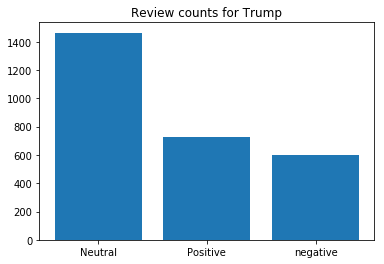

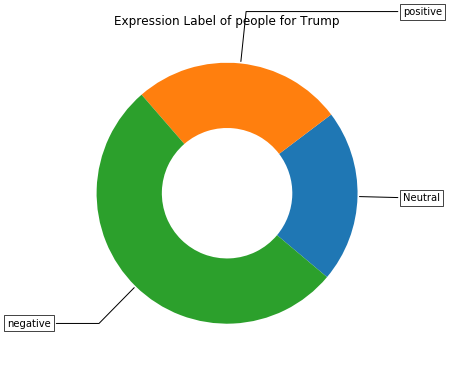

In [6]:
y_value_counts = Trump_reviews['Expression Label'].value_counts()
print(y_value_counts)
plt.title("Review counts for Trump")
plt.bar(['Neutral','Positive','negative'],y_value_counts)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Neutral", "positive","negative"]

data = [y_value_counts[2],y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Expression Label of people for Trump")

plt.show()

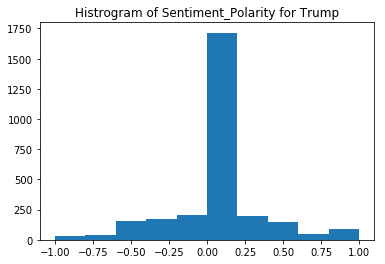

In [7]:
plt.hist(Trump_reviews['Sentiment_Polarity'])
plt.title("Histrogram of Sentiment_Polarity for Trump")
plt.show()

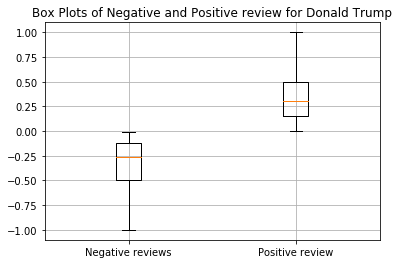

In [8]:
negative_review =Trump_reviews[Trump_reviews['Expression Label']=='negative']['Sentiment_Polarity'].values
positive_review =Trump_reviews[Trump_reviews['Expression Label']=='positive']['Sentiment_Polarity'].values
plt.boxplot([negative_review,positive_review])
plt.title('Box Plots of Negative and Positive review for Donald Trump')
plt.xticks([1,2],('Negative reviews','Positive review'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

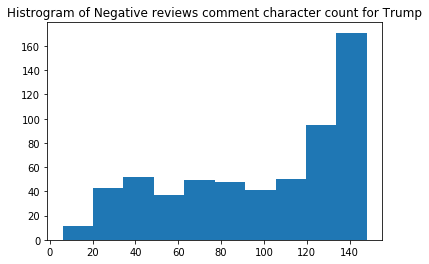

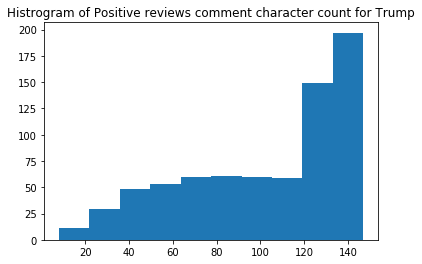

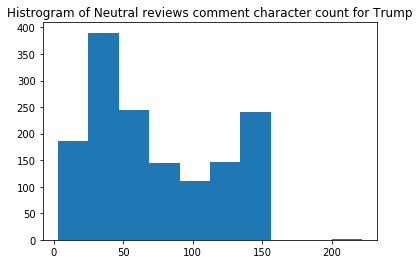

In [9]:
plt.hist(Trump_reviews[Trump_reviews['Expression Label']=='negative']['Review_Length'])
plt.title("Histrogram of Negative reviews comment character count for Trump")
plt.show()
plt.hist(Trump_reviews[Trump_reviews['Expression Label']=='positive']['Review_Length'])
plt.title("Histrogram of Positive reviews comment character count for Trump")
plt.show()
plt.hist(Trump_reviews[Trump_reviews['Expression Label']=='Neutral']['Review_Length'])
plt.title("Histrogram of Neutral reviews comment character count for Trump")
plt.show()

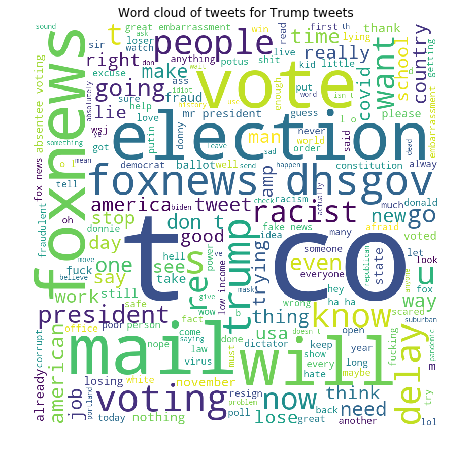

In [26]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('realdonaldtrump')
#print(stopwords)
comment_words = '' 
# iterate through the csv file 
for val in Trump_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word cloud of tweets for Trump tweets")
  
plt.show() 

In [11]:
Biden_reviews=pd.read_csv('Bidenall2.csv')

In [12]:
Biden_reviews['Sentiment_Polarity'] = Biden_reviews['text'].apply(find_pol)
Biden_reviews.tail()

,user,text,Sentiment_Polarity
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20


In [13]:
Biden_reviews['Expression Label'] = np.where(Biden_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Biden_reviews['Expression Label'][Biden_reviews.Sentiment_Polarity ==0] = "Neutral"
Biden_reviews.tail()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,user,text,Sentiment_Polarity,Expression Label
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15,positive
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00,Neutral
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00,Neutral
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10,positive
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20,positive


In [14]:


Biden_reviews['Review_Length'] = Biden_reviews['text'].apply(find_len)
Biden_reviews.tail()

,user,text,Sentiment_Polarity,Expression Label,Review_Length
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15,positive,139
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00,Neutral,57
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00,Neutral,140
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10,positive,140
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20,positive,90


Neutral     1509
positive     624
negative     407
Name: Expression Label, dtype: int64


Text(0.5,1,'Barchart of Reviews for Biden')

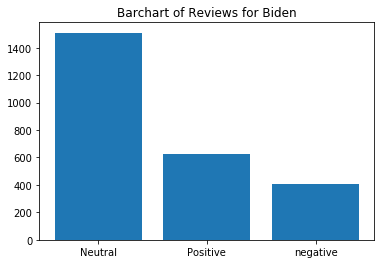

In [15]:
y_value_counts = Biden_reviews['Expression Label'].value_counts()
print(y_value_counts)
plt.bar(['Neutral','Positive','negative'],y_value_counts)
plt.title("Barchart of Reviews for Biden")


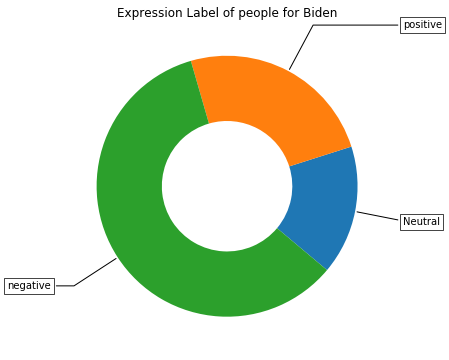

In [16]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Neutral", "positive","negative"]

data = [y_value_counts[2],y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Expression Label of people for Biden")

plt.show()

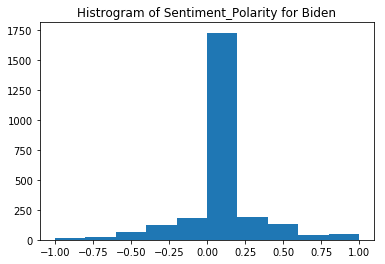

In [24]:

plt.hist(Biden_reviews['Sentiment_Polarity'])
plt.title("Histrogram of Sentiment_Polarity for Biden")
plt.show()

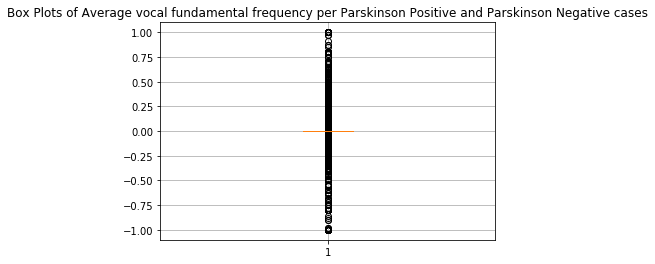

In [18]:

plt.boxplot(Biden_reviews['Sentiment_Polarity'])
plt.title('Box Plots of Average vocal fundamental frequency per Parskinson Positive and Parskinson Negative cases')
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

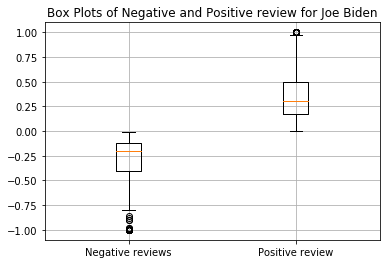

In [19]:
negative_review =Biden_reviews[Biden_reviews['Expression Label']=='negative']['Sentiment_Polarity'].values
positive_review =Biden_reviews[Biden_reviews['Expression Label']=='positive']['Sentiment_Polarity'].values
plt.boxplot([negative_review,positive_review])
plt.title('Box Plots of Negative and Positive review for Joe Biden')
plt.xticks([1,2],('Negative reviews','Positive review'))
plt.grid()
plt.show()
plt.figure(figsize=(10,3))

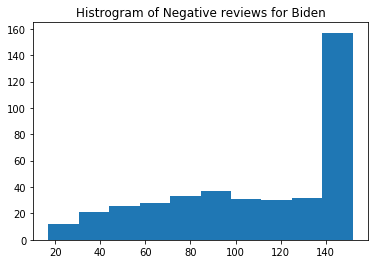

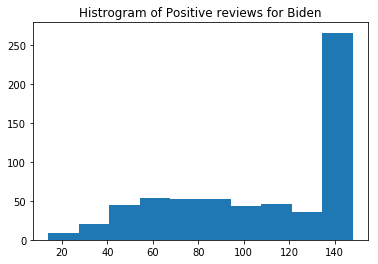

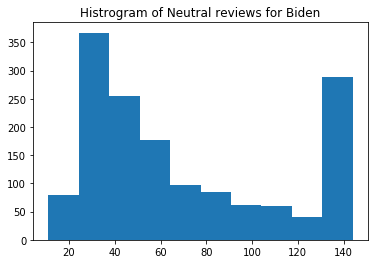

In [20]:
plt.hist(Biden_reviews[Biden_reviews['Expression Label']=='negative']['Review_Length'])
plt.title("Histrogram of Negative reviews for Biden")
plt.show()
plt.hist(Biden_reviews[Biden_reviews['Expression Label']=='positive']['Review_Length'])
plt.title("Histrogram of Positive reviews for Biden")
plt.show()
plt.hist(Biden_reviews[Biden_reviews['Expression Label']=='Neutral']['Review_Length'])
plt.title("Histrogram of Neutral reviews for Biden")
plt.show()

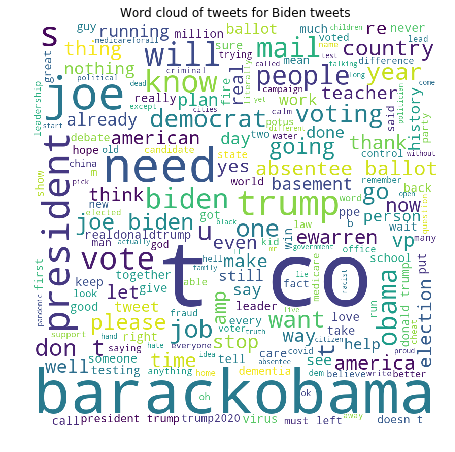

In [27]:
stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('joebiden')
#print(stopwords)
comment_words = '' 
# iterate through the csv file 
for val in Biden_reviews.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word cloud of tweets for Biden tweets")
plt.show() 